In [2]:
# dataset
## MNIST_x_train.npy 28*28
## MNIST_y_train.npy

# model
## encoder
### (784*128) (128*32) (32*2)
## decoder
### (2*32) (32*128) (128*784)

# train
## loss MSE / optim Adam
## 400 epoch
## batch size ?

# visualize
## z-dim 넣고 decoder 결과
## z-dim 


In [2]:
import numpy as np
x_train = np.load('MNIST_x_train.npy')
y_train = np.load('MNIST_y_train.npy')
print(y_train[0])


5


In [ ]:
# model
## encoder
### (784*128) (128*32) (32*2)
## decoder
### (2*32) (32*128) (128*784)

In [15]:
import torch
import numpy 
from torch.nn import MSELoss
from torch.optim import Adam

class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(784,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,2),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2,64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,784),
            torch.nn.Sigmoid()
        )

        self.optim_en = Adam(self.encoder.parameters(),lr=0.02)
        self.optim_de = Adam(self.decoder.parameters(),lr=0.02)
        self.loss_fn = MSELoss()

        self.num_epoch=400
        self.hist_loss = []
        self.hist_model = []

    def forward(self,x):
        en = self.encoder(x)
        de = self.decoder(en)
        return de

    def train(self,x_input):
        for epoch in range(1, 401):
            self.optim_en.zero_grad()
            self.optim_de.zero_grad()
            y_pred = self.forward(x_input)
            loss = self.loss_fn(y_pred, x_input)
            loss.backward()
            self.optim_de.step()
            self.optim_en.step()
            if epoch % 50 == 0:
                print(f"Epoch {epoch}: loss = {loss.item()}")

    def visualize(self):
        pass
        

In [16]:
# train
## loss MSE / optim Adam
## 400 epoch
## batch size ?

# visualize
## z-dim 넣고 decoder 결과
## z-dim 

In [18]:
x_input = torch.FloatTensor(x_train).flatten(1)


In [19]:
ae =AE()
ae.train(x_input)


Epoch 50: loss = 0.0644555613398552
Epoch 100: loss = 0.05878791585564613
Epoch 150: loss = 0.056769728660583496
Epoch 200: loss = 0.05131053179502487
Epoch 250: loss = 0.04859345406293869
Epoch 300: loss = 0.04744371771812439
Epoch 350: loss = 0.045891452580690384
Epoch 400: loss = 0.044948771595954895


Matplotlib is building the font cache; this may take a moment.


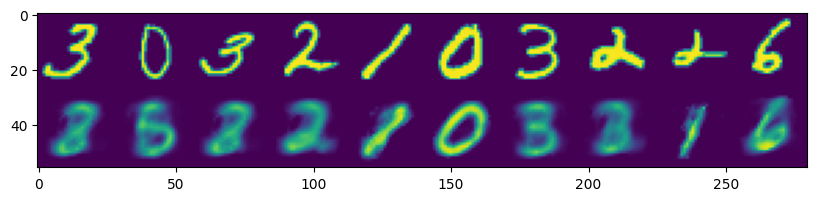

In [20]:
import matplotlib.pyplot as plt

def compare(model, n_samples = 20):
    x_np = np.load("MNIST_x_train.npy")
    x_np = x_np[np.random.choice(x_np.shape[0], n_samples)]
    y_pre = model.forward(torch.tensor(x_np, dtype=torch.float).flatten(start_dim=1)).detach().numpy()
    y_samples = y_pre.reshape(-1, 28, 28).transpose((1, 0, 2)).reshape(28, 28 * n_samples)
    x_samples = x_np.reshape(-1, 28, 28).transpose((1, 0, 2)).reshape(28, 28 * n_samples)

    plt.figure(figsize=(16, 2))
    plt.imshow(np.concatenate([x_samples, y_samples]))

compare(ae, 10)

In [21]:
torch.save(ae.state_dict(), "my_ae_trained.pth")

In [23]:
import torch
import numpy 
from torch.nn import MSELoss
from torch.optim import Adam

class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(784,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,2),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2,64),
            torch.nn.ReLU(),
            torch.nn.Linear(64,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,784),
            torch.nn.Sigmoid()
        )

        self.optim_en = Adam(self.encoder.parameters(),lr=0.02)
        self.optim_de = Adam(self.decoder.parameters(),lr=0.02)
        self.loss_fn = MSELoss()

        self.num_epoch=400
        self.hist_loss = []
        self.hist_model = []

    def forward(self,x):
        self.z = self.encoder(x)
        de = self.decoder(self.z)
        return de

    def train(self,x_input):
        for epoch in range(1, 401):
            self.optim_en.zero_grad()
            self.optim_de.zero_grad()
            y_pred = self.forward(x_input)
            loss = self.loss_fn(y_pred, x_input)
            loss.backward()
            self.optim_de.step()
            self.optim_en.step()
            if epoch % 50 == 0:
                print(f"Epoch {epoch}: loss = {loss.item()}")

    def visualize(self):
        pass
        

In [25]:
model = AE()
model.load_state_dict(torch.load("my_ae_trained.pth"))

<All keys matched successfully>

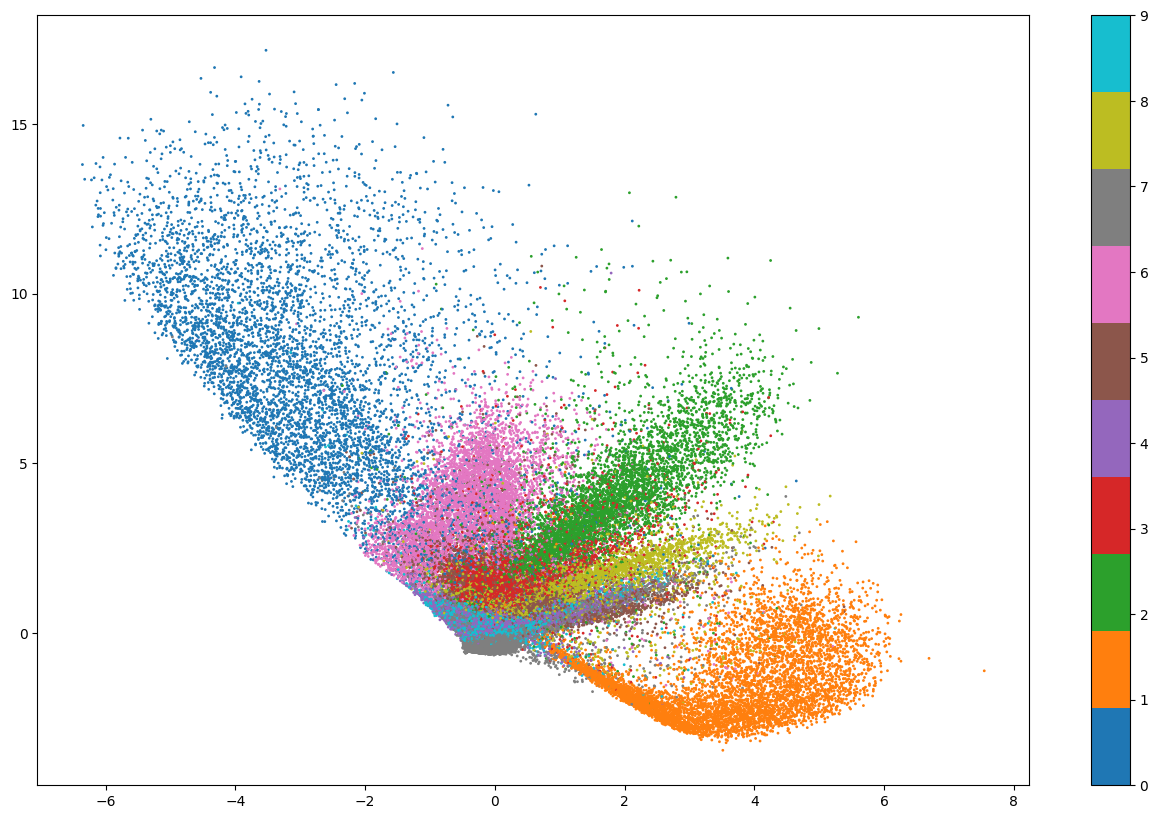

In [26]:
def visualize(model):
    x_input = torch.tensor(np.load("MNIST_x_train.npy"), dtype=torch.float).flatten(start_dim=1)
    model.forward(x_input)
    z = model.z.detach().numpy() # (60000, 2)
    y_target = np.load("MNIST_y_train.npy") # 샘플 색 결정

    plt.figure(figsize=(16, 10))
    plt.scatter(z[:,0], z[:,1], c=y_target, cmap="tab10", s = 1)
    plt.colorbar()

visualize(model)